In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from acquire import get_titanic_data
from prepare import prep_titanic_data,train_validate_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import warnings
warnings.filterwarnings("ignore")





In [23]:
df= get_titanic_data()
df= df.drop(columns=['Unnamed: 0','passenger_id','deck','age','embarked','pclass'])
df['embark_town']= df.embark_town.fillna(value='Southampton')
df.head()

,survived,sex,sibsp,parch,fare,class,embark_town,alone
0,0,male,1,0,7.2500,Third,Southampton,0
1,1,female,1,0,71.2833,First,Cherbourg,0
2,1,female,0,0,7.9250,Third,Southampton,1
3,1,female,1,0,53.1000,First,Southampton,0
4,0,male,0,0,8.0500,Third,Southampton,1


In [24]:
df.embark_town.value_counts()

Southampton    646
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [25]:
df = pd.get_dummies(df, ['sex', 'class', 'embark_town'], drop_first=True)
df.head()

,survived,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,1,0,7.2500,0,1,0,1,0,1
1,1,1,0,71.2833,0,0,0,0,0,0
2,1,0,0,7.9250,1,0,0,1,0,1
3,1,1,0,53.1000,0,0,0,0,0,1
4,0,0,0,8.0500,1,1,0,1,0,1


In [38]:
# split the data into train, validate and test()
train, validate,test = train_validate_test_split(df, target='survived', seed=123)

#create the X and Y  version for the train,validate and test
# X version has feature to be used for KNN, while Y has the target feature

X_train= train.drop(columns='survived')
y_train= train.survived

X_validate= train.drop(columns='survived')
y_validate= validate.survived

X_test= train.drop(columns='survived')
y_test= test.survived

In [39]:
X_train.head()

,sibsp,parch,fare,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
583,0,0,40.1250,1,1,0,0,0,0
165,0,2,20.5250,0,1,0,1,0,1
50,4,1,39.6875,0,1,0,1,0,1
259,0,1,26.0000,0,0,1,0,0,1
306,0,0,110.8833,1,0,0,0,0,0


### Train model

In [40]:
knn1= KNeighborsClassifier(n_neighbors=1,weights='uniform')

In [41]:
# fit the model to training
knn1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [42]:
#predictions
y_pred = knn1.predict(X_train)
y_pred[:7]

array([0, 1, 0, 1, 1, 0, 0])

In [43]:
y_train[:7]

583    0
165    1
50     0
259    1
306    1
308    0
314    0
Name: survived, dtype: int64

In [44]:
y_pred_proba = knn1.predict_proba(X_train)
y_pred_proba[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [53]:
# accuracy
print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn1.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.89


In [54]:
# confusion matrix
print(confusion_matrix(y_train, y_pred))

[[270  37]
 [ 18 173]]


In [55]:
pd.crosstab(y_train, y_pred)

col_0,0,1
survived,,
0,270,37
1,18,173


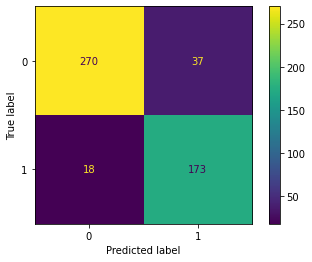

In [56]:
plot_confusion_matrix(knn1, X_train, y_train)

In [67]:
TN, FP, FN, TP = confusion_matrix(y_train, y_pred).ravel() 
TN, FP, FN, TP

(270, 37, 18, 173)

In [68]:
negative_cases = TN + FP
positive_cases = FN + TP
print(f"Negative Cases: {negative_cases}")
print(f"Positive Cases: {positive_cases}")


Negative Cases: 307
Positive Cases: 191


In [69]:
ALL = TP + FP + FN + TN

accuracy = (TP + TN)/ALL
true_positive_rate = sensitivity = recall = power = TP/(TP+FN)
false_positive_rate = false_alarm_ratio = fallout = FP/(FP+TN)
true_negative_rate = specificity = selectivity = TN/(TN+FP)
false_negative_rate = miss_rate = FN/(FN+TP)
precision = PPV = TP/(TP+FP)
f1_score = 2*(precision*recall)/(precision+recall)
support_pos = TP + FN
support_neg = FP + TN
print(f'Accuracy is {accuracy:.2%}\nPrecision is {precision:.2%}\nrecall is {recall:.2%}\nf1 score is {f1score:.2%}')



Accuracy is 88.96%
Precision is 82.38%
recall is 90.58%
f1 score is 86.28%


In [70]:
#classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       307
           1       0.82      0.91      0.86       191

    accuracy                           0.89       498
   macro avg       0.88      0.89      0.89       498
weighted avg       0.89      0.89      0.89       498



In [91]:
knn1.score(X_validate, y_validate)
y_pred=knn1.predict(X_validate)
y_pred[:5]


array([0, 1, 0, 1, 1])

In [92]:
y_validate[:5]

583    0
165    1
50     0
259    1
306    1
Name: survived, dtype: int64

In [93]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn1.score(X_validate, y_validate)))

Accuracy of KNN classifier on training set: 0.89


In [ ]:
knn1.score(X_test, y_test)

In [89]:
# setting k to 10 and 20
k=[10,20]
#using loop
for i in k:
    knn= KNeighborsClassifier(n_neighbors=i,weights='uniform')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_train)
    print('Accuracy of KNN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
    


 
    

Accuracy of KNN classifier on training set: 0.78
Accuracy of KNN classifier on training set: 0.73
